In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [4]:
X,y=make_circles(n_samples=100,noise=0.1,random_state=1)

In [16]:
# X[50:60],y[50:60]

Text(0.5, 1.0, 'Circles Dataset')

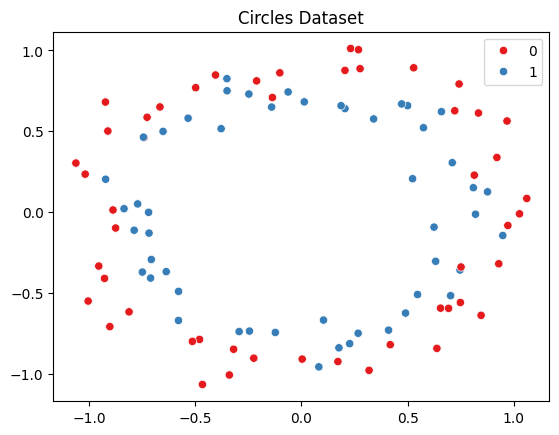

In [17]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y, palette='Set1')
plt.title('Circles Dataset')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [19]:
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 256)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,077 (12.02 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,052 (8.02 KB)

In [24]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

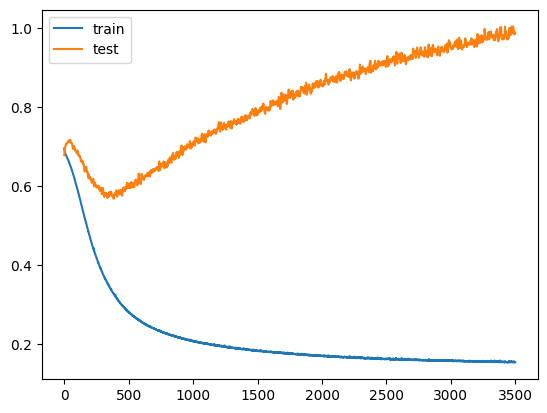

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


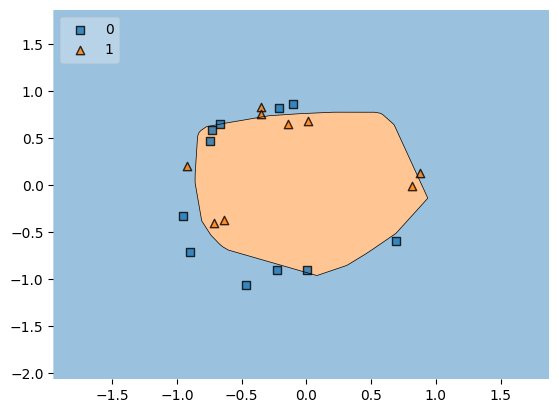

In [29]:
plot_decision_regions(X_test,y_test.ravel(), clf=model, legend=2)
plt.show()

Early_Stopping

In [30]:
model=Sequential()
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

d:\Programming\Deep_Learning\.deeplr\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
callables = EarlyStopping(monitor='val_loss',
                          patience=10,
                          verbose=1,
                          mode='min',
                          restore_best_weights=True)

In [ ]:
history=model.fit(X_train, y_train, epochs=250, verbose=0, validation_data=(X_test,y_test),collbacks=callables)
plt.plot(history.history['loss'], label='train')

TypeError: TensorFlowTrainer.fit() got an unexpected keyword argument 'collbacks'